In [1]:
pip install bing_image_downloader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bing_image_downloader import downloader

In [3]:
# downloader.download("horse",limit=100, adult_filter_off= False)
# belirli bir indirme işleminde "yetişkin içerik filtresinin" kapalı olup olmadığını belirler

In [4]:
# downloader.download("bird",limit=100, adult_filter_off= False)

## computer vision with deep learning 

In [5]:
import tensorflow as tf

In [6]:
mnist= tf.keras.datasets.mnist  
# el ayzması rakamlar tanıma

In [7]:
(train_images, train_labels), (test_images,test_labels)= mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
import matplotlib.pyplot as plt

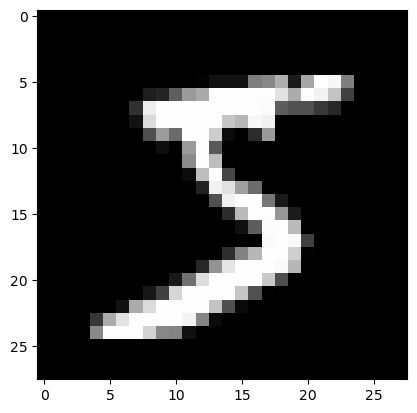

In [10]:
plt.imshow(train_images[0], cmap="gray")

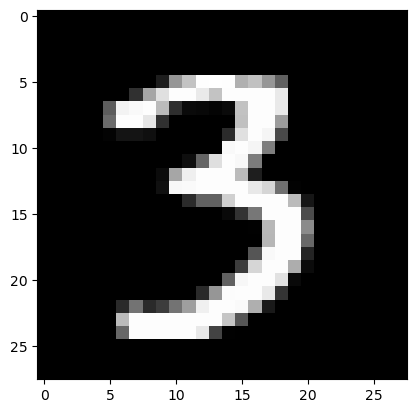

In [11]:
plt.imshow(train_images[10000], cmap="gray")

In [12]:
train_labels[10000]

3

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
# normalize data

In [15]:
train_images= train_images/255.0
test_iamges= test_images/255.0
#  bir resim 0 255 arası piksekllere sahip 255 e bölerek değeleri 0 1 arasına normalize etmiş oluyoruz

<img src= https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg>

## convolutional neural networks  -CNN  -image classificaiton

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer,Reshape, MaxPooling2D,Flatten, Dropout,BatchNormalization

In [23]:
model= Sequential()
# Sequential(): Katmanları sırayla ekleyebileceğiniz bir model türüdür. Modelin akışı sırasal olacak, yani her katman bir öncekine bağlıdır.
model.add(InputLayer(input_shape=(28,28)))
# InputLayer(input_shape=(28,28)): Modelin giriş boyutu 28x28 olarak ayarlanır. Bu, girdi verisinin bir 28x28 boyutundaki görüntü olduğunu belirtir.
model.add(Reshape(target_shape=(28,28,1)))
# Reshape(target_shape=(28,28,1)): Görüntü 2D (28x28) bir formattan 3D (28x28x1) bir formata çevrilir. Son boyut olan 1, görüntünün gri tonlamalı olduğunu (tek renk kanalı) belirtir. Renkli görüntülerde bu değer 3 olur (RGB kanalları için).
model.add(Conv2D(filters=12,kernel_size=(3,3),activation="relu"))
# filters=12: 12 adet filtre uygulanacak. Bu, 12 farklı özellik haritası çıkarılacağı anlamına gelir.
# kernel_size=(3,3): 3x3 boyutunda filtreler kullanılacak.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# Flatten(): 2D (veya 3D) özellik haritaları düzleştirilir ve tek bir boyuta dönüştürülür. Bu, yoğun (fully connected) katmana geçmeden önce verilerin bir vektör haline getirilmesi içindir.
model.add(Dense(10))  
#  10farklı cevap classificition 0-9 a kadar olan rakamlar
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
    # optimizer="adam": Modelin parametrelerini optimize etmek için Adam optimizasyon algoritması kullanılır. Adam, öğrenme hızı ayarlamalarını otomatik olarak yapan verimli bir algoritmadır.
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Kayıp fonksiyonu olarak Sparse Categorical Crossentropy kullanılır. Bu, her sınıfa ait olasılıkları hesaplayarak sınıflandırma hatasını ölçer. from_logits=True demek, çıktıların doğrudan tahmin edilen logit değerlerinden geldiğini belirtir.
# metrics=["accuracy"]: Eğitim sırasında modelin başarımını değerlendirmek için doğruluk metriği (accuracy) kullanılacak.


In [18]:
model.fit(train_images,train_labels, validation_split= .10 , epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8640 - loss: 0.4978 - val_accuracy: 0.9628 - val_loss: 0.1449
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9592 - loss: 0.1476 - val_accuracy: 0.9733 - val_loss: 0.0960
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9705 - loss: 0.1025 - val_accuracy: 0.9768 - val_loss: 0.0817
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0761 - val_accuracy: 0.9820 - val_loss: 0.0700
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9816 - loss: 0.0598 - val_accuracy: 0.9827 - val_loss: 0.0626
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9842 - loss: 0.0518 - val_accuracy: 0.9810 - val_loss: 0.0659
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9865 - loss: 0.0466 - val_accuracy: 0.9852 - val_loss: 0.0581
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0425 - 

In [19]:
loss,accuracy = model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.5797 - loss: 652.6223


In [20]:
accuracy

0.6014999747276306

In [21]:
model.save("benimmodel.h5")

In [ ]:
# df= tf.keras.utils.image_dataset_from_directory("Skin_Data")

In [25]:
model= Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(60))  
model.add(Dropout(.25))
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


C:\Users\zeyil\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
#  deep learningde başarı oranını arttırma teknikleri
1- Layers saysını arttırma
2- neuron sayısını arttırma
3- Dropout overfittingi engeller daha iyi öğrenmeyi saağlar
4- batchnormalizaiton
5- 